<a href="https://colab.research.google.com/github/redman157/HocML/blob/master/landmark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"pson2900","key":"977eb592f0fe57a4c97e7d050cf9c637"}'}

In [2]:
!ls -lha kaggle.json
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list


-rw-r--r-- 1 root root 64 Apr 29 02:25 kaggle.json
ref                                                          title                                                size  lastUpdated          downloadCount  
-----------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
ronitf/heart-disease-uci                                     Heart Disease UCI                                     3KB  2018-06-25 11:33:56          36377  
russellyates88/suicide-rates-overview-1985-to-2016           Suicide Rates Overview 1985 to 2016                 396KB  2018-12-01 19:18:25          24819  
iarunava/cell-images-for-detecting-malaria                   Malaria Cell Images Dataset                         337MB  2018-12-05 05:40:21           5324  
karangadiya/fifa19                                           FIFA 19 complete player dataset                       2MB  2018-12-21 03:52:59          25373  
bigquer

In [3]:
!kaggle competitions download -c landmark-retrieval-2019
!kaggle competitions download -c landmark-recognition-2019

  0% 0.00/1.24M [00:00<?, ?B/s]
100% 1.24M/1.24M [00:00<00:00, 73.4MB/s]
  0% 0.00/1.20M [00:00<?, ?B/s]
100% 1.20M/1.20M [00:00<00:00, 66.1MB/s]


In [4]:
!unzip retrieval_sample_submission.csv.zip
!unzip recognition_sample_submission.csv.zip

Archive:  retrieval_sample_submission.csv.zip
  inflating: retrieval_sample_submission.csv  
Archive:  recognition_sample_submission.csv.zip
  inflating: recognition_sample_submission.csv  


# import data

In [0]:
import pandas as pd
import numpy as np
import requests
import os
import urllib.parse
import matplotlib.pyplot as plt
import seaborn as sns

data_recognition = pd.read_csv('recognition_sample_submission.csv')
data_retrieval = pd.read_csv('retrieval_sample_submission.csv')

train_data = 'https://s3.amazonaws.com/google-landmark/metadata/train.csv'
train_attr = 'https://s3.amazonaws.com/google-landmark/metadata/train_attribution.csv'

In [10]:
data_retrieval.head(5)

,id,images
0,97a902dee49b61b4,007eda76138e36e1 0e86e9dd3099ce42
1,14289cc41c49feb0,007eda76138e36e1 0e86e9dd3099ce42
2,ccb0a36d5377d303,007eda76138e36e1 0e86e9dd3099ce42
3,f8c002fea206c06a,007eda76138e36e1 0e86e9dd3099ce42
4,df2a363eb00515e7,007eda76138e36e1 0e86e9dd3099ce42


# download and create folder

In [0]:
def download_data(url, address):
  fileName = url.split('/')[-1]
  name = urllib.parse.quote(fileName)
  r = requests.get(url, allow_redirects=True)
  with open(address + "/" + name, 'wb') as f:
    f.write(r.content)

def create_folder(path):
  try:  
    os.mkdir(path)
  except OSError:  
    print ("Creation of the directory %s failed" % path)
  else:  
    print ("Successfully created the directory %s " % path)

In [153]:
download_data(train_attr, '/content/')
download_data(train_data, '/content/')
create_folder('train')

Successfully created the directory train 


In [0]:
train = pd.read_csv('train.csv')
train_att = pd.read_csv('train_attribution.csv')

# visualation data

In [0]:
counts = train['landmark_id'].value_counts()
df = pd.DataFrame(data= counts)
df.reset_index(inplace= True)
df.columns = ['landmark_id', 'count']

In [0]:
sdf = df.sort_values('count', ascending = False)

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_core.py:1001: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_xlim(left, right)


[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Landmarks')]

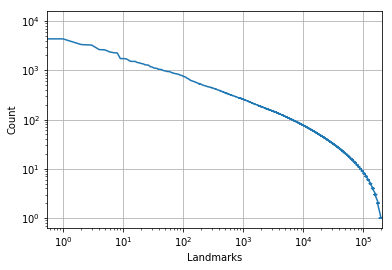

In [112]:
ax = sdf['count'].plot(loglog = True, grid = True)
ax.set(xlabel="Landmarks", ylabel="Count")

# get Name image and web site

In [0]:
url_site = train['url'].str.split('/').tolist()
site = set([sites[2] for sites in url_site])

In [144]:
site

{'upload.wikimedia.org'}

In [137]:
labels = []
for i in range(len(url_site)):
  labels.append(url_site[i][7])
labels[13]

'%D0%A1%D0%BA%D0%B5%D0%B9%D1%82%D0%B1%D0%BE%D1%80%D0%B4%D0%B8%D1%81%D1%82%D1%8B._-_panoramio.jpg'

In [0]:
a = download_data(img['url'][13],'/content/')

In [0]:
colab_url = [img for img in train['url']]
c

In [0]:
array = []
for i in range(len(colab_url)):
  for name in colab_url[i]:
    array.append(name.split('/')[-1])

# test code download folder image and make folder

In [0]:
import pandas as pd
import os, multiprocessing, urllib.request, csv
from PIL import Image
from io import BytesIO
from tqdm import tqdm
import logging
file='train' #change after with test
if not os.path.exists('images_train'):
    os.mkdir('images_train')
out_dir = 'images_train/{}'.format(file)
data_file = '/content/{}.csv'.format(file)
#download data from : https://www.kaggle.com/c/landmark-recognition-challenge/data
def ParseData(data_file):
    csvfile = open(data_file, 'r')
    csvreader = csv.reader(csvfile)
    key_url_list = [line[:2] for line in csvreader]
    return key_url_list[1:]  # Chop off header
  
def download_data(url, address):
  name = urllib.parse.quote(fileName)
  r = requests.get(url, allow_redirects=True)
  with open(address + "/" + name, 'wb') as f:
    f.write(r.content)

In [0]:
df = pd.read_csv('train.csv')
df_ = df.drop('landmark_id', axis = 1)

In [0]:
df_ = df_.values

In [29]:
img = 'img'

'6e158a47eb2ca3f6'

In [27]:
url

array([['3ad87684c99c06e1',
        'http://upload.wikimedia.org/wikipedia/commons/2/2c/Pirmasens_Dynamikum.jpg'],
       ['e7f70e9c61e66af3',
        'https://upload.wikimedia.org/wikipedia/commons/0/02/Occidental_Vertical.jpg'],
       ['4072182eddd0100e',
        'https://upload.wikimedia.org/wikipedia/commons/5/51/Looking_downstream_from_the_footbridge_over_the_Severn_-_geograph.org.uk_-_532337.jpg'],
       ...,
       ['fd0725460e4ebbec',
        'https://upload.wikimedia.org/wikipedia/commons/5/53/Troms%C3%B8_2013_06_05_3708_%2810117844744%29.jpg'],
       ['73691ae29e24ba19',
        'https://upload.wikimedia.org/wikipedia/commons/9/91/Kirti_Stambha_4.jpg'],
       ['8ef8dff6fc4790c2',
        'https://upload.wikimedia.org/wikipedia/commons/8/85/White_Tower%2C_London%2C_August_2014.JPG']],
      dtype=object)

In [180]:
train.head(2)

,id,url,landmark_id
0,6e158a47eb2ca3f6,https://upload.wikimedia.org/wikipedia/commons...,142820
1,202cd79556f30760,http://upload.wikimedia.org/wikipedia/commons/...,104169


In [0]:
ParseData(data_file)